Load the image of Dog.jpg

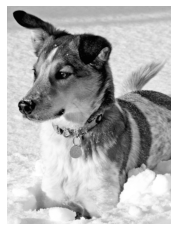

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Compute the full SVD

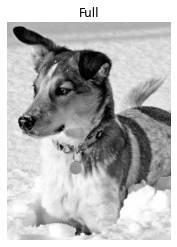

In [2]:
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)

m, n = X.shape
X_reconstructed = U[:,:n] @ S @ VT[:m,:]

j=0
plt.figure(j+1)
j += 1
img = plt.imshow(X_reconstructed)
img.set_cmap('gray')
plt.axis('off')
plt.title('Full')
plt.show()

Choose rank 10, confirm U*U is the 10x10 identity matrix

note: due to the nature of numpy precision, most of the time we get an very small number that is indisinguishable to 0 by the computer... in this case  number to the 10^-16 or 10^-17 power. If we treat these small values as 0 below we do in fact have the identity matrix.

In [3]:
U[:,:10].T.conj() @ U[:,:10]

array([[ 1.00000000e+00, -9.71445147e-17,  3.46944695e-18,
        -2.22044605e-16,  0.00000000e+00, -6.93889390e-18,
        -5.03069808e-17,  5.89805982e-17, -2.42861287e-17,
        -1.73472348e-17],
       [-9.71445147e-17,  1.00000000e+00,  1.76941795e-16,
        -2.30718222e-16, -2.29796650e-16,  1.24900090e-16,
        -5.29090660e-17,  2.77555756e-17,  2.31585584e-16,
        -4.68375339e-17],
       [ 3.46944695e-18,  1.76941795e-16,  1.00000000e+00,
         1.16443313e-16,  3.20923843e-16, -1.90819582e-17,
         1.90819582e-17,  1.41488384e-16, -1.04083409e-16,
        -1.21430643e-17],
       [-2.22044605e-16, -2.30718222e-16,  1.16443313e-16,
         1.00000000e+00, -4.51028104e-16, -8.32667268e-17,
        -1.26634814e-16, -5.55111512e-17, -1.75207071e-16,
        -3.03576608e-17],
       [ 0.00000000e+00, -2.29796650e-16,  3.20923843e-16,
        -4.51028104e-16,  1.00000000e+00, -1.17961196e-16,
         1.46584134e-16, -1.21430643e-17, -8.23993651e-17,
         2.

Show UU* is not the 10x10 identity matrix

In [4]:
U[:,:10] @ U[:,:10].T.conj()

array([[0.0012135 , 0.00119587, 0.00119168, ..., 0.00137553, 0.00137222,
        0.00137185],
       [0.00119587, 0.00117946, 0.00117595, ..., 0.00135309, 0.00134965,
        0.00134877],
       [0.00119168, 0.00117595, 0.00117383, ..., 0.00133322, 0.00132903,
        0.00132772],
       ...,
       [0.00137553, 0.00135309, 0.00133322, ..., 0.00232848, 0.00234821,
        0.00235669],
       [0.00137222, 0.00134965, 0.00132903, ..., 0.00234821, 0.0023703 ,
        0.00238033],
       [0.00137185, 0.00134877, 0.00132772, ..., 0.00235669, 0.00238033,
        0.00239231]])

Compute norm of error between U*U and and the nxn identity matrix as the rank r varies from 1 to n and plot the error:

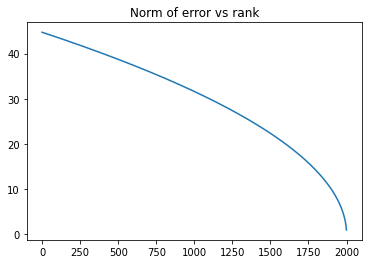

In [8]:
x_points = []
y_points = []
for x in range(m):
  x_points.append(x)
  y_points.append(np.linalg.norm((U[:,:x] @ U[:,:x].T.conj()) - np.identity(m)))


plt.plot(np.array(x_points), np.array(y_points))
plt.title("Norm of error vs rank")
plt.show()